# **Project Overview**

- In this Capstone project, you'll embark on creating a National ID Card Recognition system using OCR (Optical Character Recognition) technology. The core of this project involves utilizing Tesseract OCR, a renowned open-source OCR engine, to accurately recognize and extract text from images of national ID cards. Additionally, OpenCV, a powerful open-source computer vision library, will be employed to preprocess the images, enhancing their quality for better text recognition. This project aims to provide practical experience with OCR and computer vision techniques, which are pivotal in the realm of artificial intelligence.



### Install essential libararies

In [711]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import pytesseract
import numpy as np

# Load ID card image with Grayscale and RGB conversions.

In [806]:
BGR_ID_IMG = cv2.imread('id.jpg')
GRAY_ID_IMG = cv2.cvtColor(BGR_ID_IMG, cv2.COLOR_BGR2GRAY)
RGB_ID_IMG = cv2.cvtColor(BGR_ID_IMG, cv2.COLOR_BGR2RGB)

**Display the image in both grayscale and RGB modes**

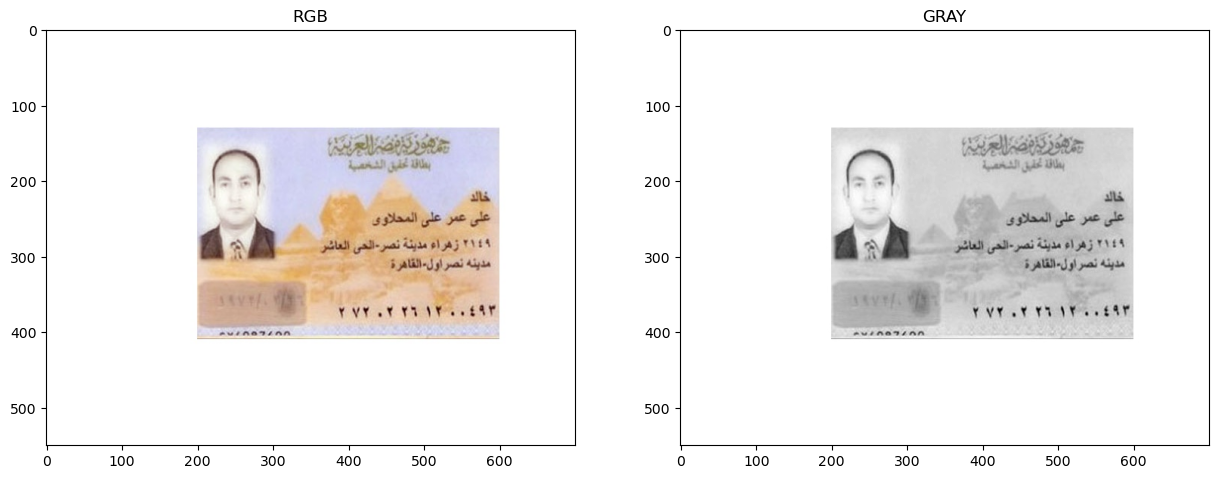

In [809]:
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(RGB_ID_IMG), plt.title('RGB')
plt.subplot(122), plt.imshow(GRAY_ID_IMG, 'gray'), plt.title('GRAY')
plt.show()

# Filtering and noise reduction

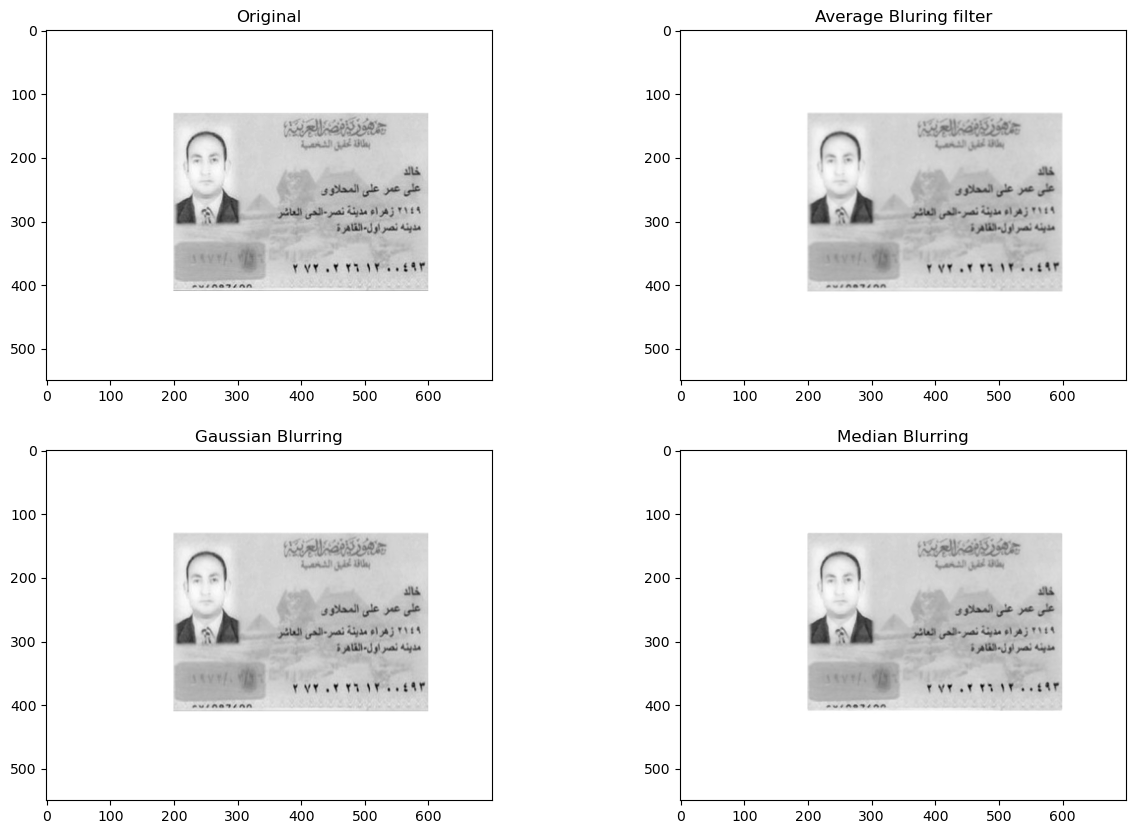

In [812]:
GRAY_ID_IMG_bl_F = cv2.blur(GRAY_ID_IMG,(3,3))
GRAY_ID_IMG_gau_F = cv2.GaussianBlur(GRAY_ID_IMG,(1,3), 0)
GRAY_ID_IMG_med_F = cv2.medianBlur(GRAY_ID_IMG,3)
plt.figure(figsize=(15,10))

plt.subplot(221), plt.imshow(GRAY_ID_IMG, 'gray'), plt.title('Original')
plt.subplot(222), plt.imshow(GRAY_ID_IMG_bl_F, 'gray'), plt.title('Average Bluring filter')
plt.subplot(223), plt.imshow(GRAY_ID_IMG_gau_F, 'gray'), plt.title('Gaussian Blurring')
plt.subplot(224), plt.imshow(GRAY_ID_IMG_med_F, 'gray'), plt.title('Median Blurring')
plt.show()

**For noise reduction, GaussianBlur functiion gives us the best result**

# Edge Detection
- We will use canny algorithm for edge detection specifying minVal eqauls 100 and maxVal equals 200.

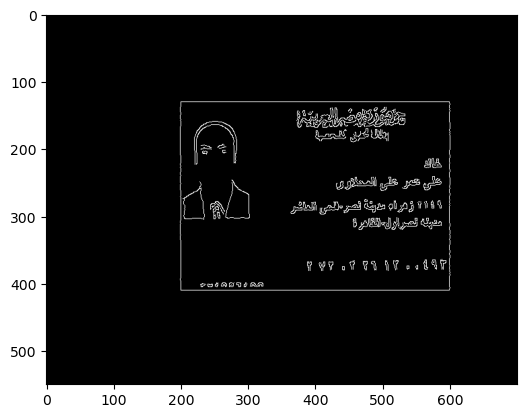

In [816]:
canny_image = cv2.Canny(GRAY_ID_IMG_gau_F, 100, 200)
plt.imshow(canny_image, 'gray')
plt.show()

# Employ the Find Contours method to accurately isolate the ID card from the background and adjust its perspective.

In [819]:
# find the contours list and sort them on the area of the contours in descending order.
contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [821]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [823]:
# to find the card_contour and apply approxPolyDP function to give the best approximation of a polygonal surrounding the card
for contour in contours:
    epsilon = .1 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    if len(approx)==4:
        card_contour = approx
        break



**Isolate the ID card from the background and adjust its perspective.**

In [826]:
BGR_ID_IMG = cv2.drawContours(BGR_ID_IMG, [card_contour], -1, (0, 255, 0), 2)

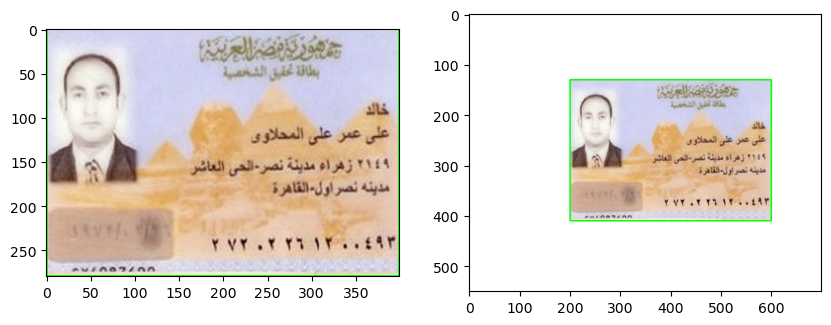

In [828]:
min_x = min(card_contour.reshape(4,2)[:,0])
max_x = max(card_contour.reshape(4,2)[:,0])
min_y = min(card_contour.reshape(4,2)[:,1])
max_y = max(card_contour.reshape(4,2)[:,1])
isolated_id_bgr = BGR_ID_IMG[min_y:max_y,min_x:max_x]
isolated_id_rgb = cv2.cvtColor(isolated_id, cv2.COLOR_BGR2RGB)
RGB_ID_IMG = cv2.cvtColor(BGR_ID_IMG, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))

plt.subplot(121), plt.imshow(isolated_id_rgb)
plt.subplot(122), plt.imshow(RGB_ID_IMG)
plt.show()

## **Text Recognition with Tesseract OCR:**

    - Pass the preprocessed image to Tesseract OCR for text extraction.
    - Fine-tune Tesseract's parameters to improve accuracy for the specific layout and text style of national ID cards.

In [831]:
def extract_Text(warped):
    """ give the name, address and id national number from the image """
    
    height,width = warped.shape[:2]
    h = int(height/4) + 5
    w=int(width/4)
    image1=warped.copy()
    strs = [""]*3
    for i in range(1,4):
        if (i==1):
            image = image1[h*i-10:h*(i+1)-11,w:w*4]
            img_name=image.copy()
            text = pytesseract.image_to_string(image,lang='ara')
            strs[i-1] = text.strip()

        elif (i==2):
            image = image1[h*i-20:h*(i+1)-25,w-2:w*4]
            img_add=image.copy()
            text = pytesseract.image_to_string(image,lang='ara')
            strs[i-1] = text[1:].strip().replace('\n','-')

        elif (i==3):
            image = image1
            img_ID= image.copy()
            text = pytesseract.image_to_string(image,lang='ara_number').strip().split("\n")[-1].replace(' ','')
            strs[i-1] = text
    print("Name : " + strs[0])
    print("Address : " + strs[1])
    print("NID : " + strs[2])
    return img_name,img_add,img_ID, strs

In [833]:
img_name,img_add,img_ID, strs= extract_Text(isolated_id_bgr)

Name : على عمر على المحلاوى
Address : زهراء مدينة نصر-الحى العاشر-مدينه نصراول-القاهرة
NID : 27202261200492


# Data Structuring:

    - Organize the extracted text into a structured format.
    - Use pandas DataFrame to store the recognized information in a clear and accessible way, such as Name, ID Number, Date of Birth, etc.

**Import datetime package and extract the birth date from the ID and make dict for all insghts**

In [837]:
from datetime import datetime

In [839]:
Data_dict = dict(zip(["Name", "Address", "ID Number"], strs))

In [841]:
date = datetime.strptime(Data_dict["ID Number"][1:7], "%y%m%d").date()

In [843]:
Data_dict['Birth Date'] = date
Data_dict

{'Name': 'على عمر على المحلاوى',
 'Address': 'زهراء مدينة نصر-الحى العاشر-مدينه نصراول-القاهرة',
 'ID Number': '27202261200492',
 'Birth Date': datetime.date(1972, 2, 26)}

In [845]:
Dataframe = pd.DataFrame(Data_dict, index=[0])
Dataframe

,Name,Address,ID Number,Birth Date
0,على عمر على المحلاوى,زهراء مدينة نصر-الحى العاشر-مدينه نصراول-القاهرة,27202261200492,1972-02-26


# Conclusion

- By using OpenCV methods for image pre-processing and Tesseract OCR for text extraction, we finally got the data we needed from the ID card image as structured data.